# Evaluation

A system fetches N documents and TP from these are relevant for a given query. 

Data to execute a code:

In [31]:
params = {'N':[10, 50, 75, 100], 'TP':[5, 15, 25, 50]}

## Create the datastream generator

In [32]:
import random

class DocGenerator:
    def __init__(self, n=10, tp=5):
        self.n = n
        self.tp = tp
        self.n_i = 0
        self.tp_i = 0
        self.item = -1

    def __iter__(self):
        return self

    def __next__(self):
        if self.n_i >= self.n:
            raise StopIteration

        if self.n_i <= self.n:
            if self.tp_i < self.tp and self.n-self.n_i == self.tp - self.tp_i:
                self.tp_i += 1
                self.n_i+= 1
                self.item = 1
                return self.item
            elif self.tp_i < self.tp:    
                self.item = random.randint(0, 1)
                if self.item == 1:
                    self.tp_i += 1
                self.n_i+= 1
                return self.item
            else: 
                self.n_i+= 1
                self.item = 0
                return self.item

## Calculate precision and recall for every document

In [33]:
def create_stream_descr(generator):
    description = {'relevant': [], 'recall': [], 'precision': []}
    values = ''
    
    for item in generator:
        if item == 1:
            description['relevant'] += [generator.n_i-1]
        description['recall'] += [generator.tp_i/generator.tp]
        description['precision'] += [generator.tp_i/generator.n_i]
        values += str(item)
        
    return description, values

## Calculate interpolated precision

In [34]:
# help-function
def find_index_of_first_greater_or_equal_element(value_list, value_to_find):
    for i in range(len(value_list)):
        if value_list[i] >= value_to_find:
            return i
    return -1

In [35]:
def compute_precision_interp(stream_descr, r_levels):
    import numpy as np
    
    result = []
    for level in r_levels:
        index = find_index_of_first_greater_or_equal_element(stream_descr['recall'], level)
        if index != -1:
            result += [max(stream_descr['precision'][index:])]         
    return result

## Plot the pointwise precision and recall

In [36]:
def generate_plot(stream_description):
    import matplotlib.pyplot as plt
    import numpy as np
    
    fig, axs = plt.subplots()
    axs.plot(stream_description['recall'], stream_description['precision'], 'o-')
    axs.set_xlabel('recall')
    axs.set_ylabel('precision')
    axs.set_title('Precision Recall Graph')
    plt.grid(True)

    step = 0.1
    r_levels = np.arange(0, 1+step, step)
    axs.plot(r_levels, compute_precision_interp(stream_description, r_levels), 'o-')
    plt.legend(['point-wise precision and recall','interpolated precision'], 
                bbox_to_anchor=(0.6, -0.2))

1st parameters:

In [37]:
g = DocGenerator(params['N'][0], params['TP'][0])
description1, values = create_stream_descr(g)
print(values)

1011000011


Example stream description:

In [48]:
description1

{'precision': [1.0,
  0.5,
  0.6666666666666666,
  0.75,
  0.6,
  0.5,
  0.42857142857142855,
  0.375,
  0.4444444444444444,
  0.5],
 'recall': [0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6, 0.8, 1.0],
 'relevant': [0, 2, 3, 8, 9]}

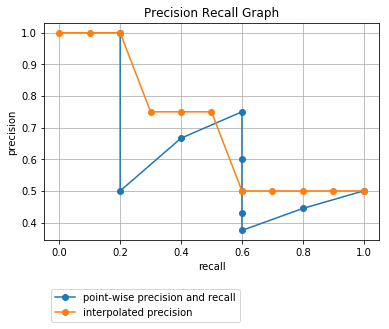

In [38]:
generate_plot(description1)

2nd parameters:

In [39]:
g = DocGenerator(params['N'][1], params['TP'][1])
description2, values = create_stream_descr(g)
print(values)

01110110000000111000001011111100000000000000000000


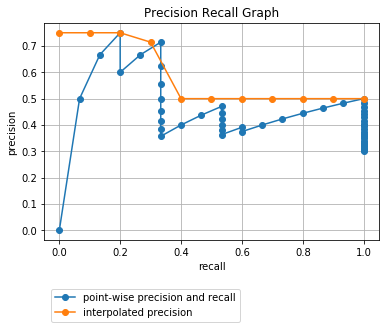

In [40]:
generate_plot(description2)

3rd parameters:

In [41]:
g = DocGenerator(params['N'][2], params['TP'][2])
description3, values = create_stream_descr(g)
print(values)

010001101001100110001001011001001001011111111011000000000000000000000000000


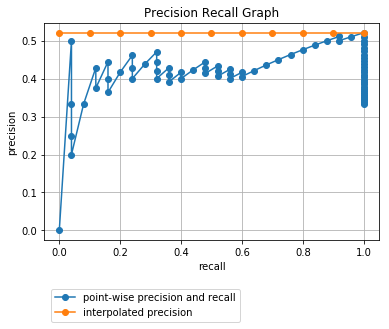

In [42]:
generate_plot(description3)

4th parameters:

In [43]:
g = DocGenerator(params['N'][3], params['TP'][3])
description4, values = create_stream_descr(g)
print(values)

0000110111000111110101110011111011001010110110100110101010011000010000111000100001101011000000101111


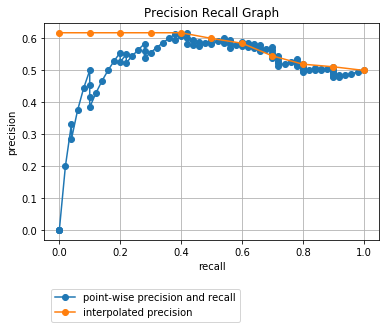

In [44]:
generate_plot(description4)

## Calculate MAP for all data streams
AP (Average precision): is computed for a query as mean over precisions for all relevant documents.

MAP (Mean Average precision): is computed as mean over AP for several queries.

In [45]:
def query_average_precision(stream_descr):
    result = 0
    result += sum([stream_descr['precision'][i] for i in stream_descr['relevant']])
    return result/len(stream_descr['relevant'])

In [46]:
def mean_average_precision(stream_descr_list):
    result = 0
    for item in stream_descr_list:
        result += query_average_precision(item)
    return result/len(stream_descr_list)

for generated datastreams:

In [47]:
print('MAP for generated datastreams: ', round(mean_average_precision([description1, description2, description3, description4]), 3))

MAP for generated datastreams:  0.542
